# Research Notebook
## Ismael Hamza Ismael
## Date: 27th/02/2025

# 1: Experience
## Describe at least one research activity you worked on this week. 

This week I ran a simulation of the blackhole mass evolution in coordination with my colleagues. We varied the BlackHole Eddington factor to see the effects it has on the accretion rates and the final mass of the BHs.
I also attended our weekly meeting to hear from the teammmates, mentors and the supervisor.

## Motivation:

Before JWST was launched, it was generally thought that BHs could not grow to very large masses, typically to around ~10^9[M_sun] [Ref1], but the situation is different now. Efforts are being channelled to meet this new challenge. So this week, we wanted to see what would happen suppose the BHs were to accrete at superEddington rates. To accomplish this we varied the BlackHole Eddington Factor(BHEF) to see if this can be sustained and the consequences this may in turn have on the Gas, stellar and Halo masses in the vicinity of the accreting BHs.

# 2: What? (What happened?)
## Describe what happened during your activities for the week.

After each one of the members in my group changed the BHEF to different values and ran the simulations for 24 hrs, we plotted the masses of the BHs, Gas mass, Metallicity and Halo masses as functions of the stellar masses and then compared these plots to when the BHEF was set at 1.0. The code I used is shown below (This is a modified version of the code suggested by Prof. R. Kannan).

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
snapshot=13
#mass units of simulations 1e10/h - to get mass in solarmass multiply by 1e10 and divide by h=0.6774
path="/scratch/k/kannanr/hamza25/Test_L100_256/output/"

gname = str.format('{0:03.0f}', snapshot)
num1 = 0
num1name = str(num1)
file1 = path+"/groups_"+gname+"/fof_subhalo_tab_"+gname+"."+num1name+".hdf5"
ds = {'filename': file1}
with h5py.File(file1, 'r') as f:
    for key in f['Header'].attrs.keys():
        ds[key] = f['Header'].attrs[key]
numfiles = ds['NumFiles']
#print (numfiles)

num1=0
bhmass=[]
stmass=[]
hmass=[]
gasmass=[]
sfr = []
metallicity =[]
while(num1<numfiles):
    num1name = str(num1)
    curfile = path+"/groups_"+gname+"/fof_subhalo_tab_"+gname+"."+num1name+".hdf5"
    f = h5py.File(curfile, 'r')
    data00 = np.array(f["Subhalo/SubhaloBHMass"])
    data11 = np.array(f["Subhalo/SubhaloMassType"][:,4])
    data22 = np.array(f["Subhalo/SubhaloMass"])
    data33 = np.array(f["Subhalo/SubhaloMassType"][:,0])
    data44 = np.array(f["Subhalo/SubhaloSFR"])
    data55 = np.array(f["Subhalo/SubhaloGasMetallicity"])
    if(num1==0):
        bhmass = data00
        stmass = data11
        hmass = data22
        gasmass = data33
        sfr = data44
        metallicity = data55
    else:
	bhmass = np.concatenate((bhmass, data00))
        stmass = np.concatenate((stmass, data11))
        hmass = np.concatenate((hmass, data22))
        gasmass = np.concatenate((gasmass, data33))
        sfr = np.concatenate((sfr, data44))
        metallicity = np.concatenate((metallicity, data55))
    num1 += 1
    f.close()
#print (len(bhmass), np.min(bhmass*1e10/0.6774), np.max(bhmass*1e10/0.6774))

plt.figure()
plt.yscale('log')
plt.xscale('log')
plt.scatter(stmass*1e10/0.6774,hmass*1e10/0.6774)
plt.xlabel("Stellar mass[log]")
plt.ylabel("Halo mass[log]")
plt.savefig("SimulationStellarHalorelationloglog.png")
plt.title("Halo mass vs Stellar mass for parameter = 2")
plt.show

plt.figure()
plt.yscale('log')
plt.xscale('log')
plt.scatter(stmass*1e10/0.6774,gasmass*1e10/0.6774)
plt.xlabel("Stellar mass[log]")
plt.ylabel("Gas mass[log]")
plt.savefig("simulationStellarGasrelationloglog.png")
plt.title("Gas mass vs Stellar mass for parameter = 2")
plt.show()


plt.figure()
plt.yscale('log')
plt.xscale('log')
plt.scatter(stmass*1e10/0.6774,metallicity)
plt.xlabel("Stellar mass[log]")
plt.ylabel("metallicity[log]")
plt.savefig("SimulationStellarMetallicityrelationloglog.png")
plt.title("Metallicity vs Stellar mass for parameter = 2")
plt.show()

plt.figure()
plt.yscale('log')
plt.xscale('log')
plt.scatter(gasmass*1e10/0.6774,bhmass*1e10/0.6774)
plt.xlabel("Gas mass[log]")
plt.ylabel("BH mass[log]")
plt.savefig("SimulationBHGasrelationloglog.png")
plt.title("BH mass vs Gas mass for parameter = 2")
plt.show()

plt.figure()
plt.yscale('log')
plt.xscale('log')
plt.scatter(stmass*1e10/0.6774,sfr)
plt.xlabel("Stellar mass[log]")
plt.ylabel("SFR[log]")
plt.savefig("SimulationStellarSFRrelationloglog.png")
plt.title("SFR vs Stellar mass for parameter = 2")
plt.savefig("SimulationSFRvsSTELLARMASS_plots.png")
plt.show()

# 3: So what? (What does it mean?)
## Describe your results

The resulting plots are shown below. I show only the BH mass vs Gas mass plot to represent all the other quantities that were studied.

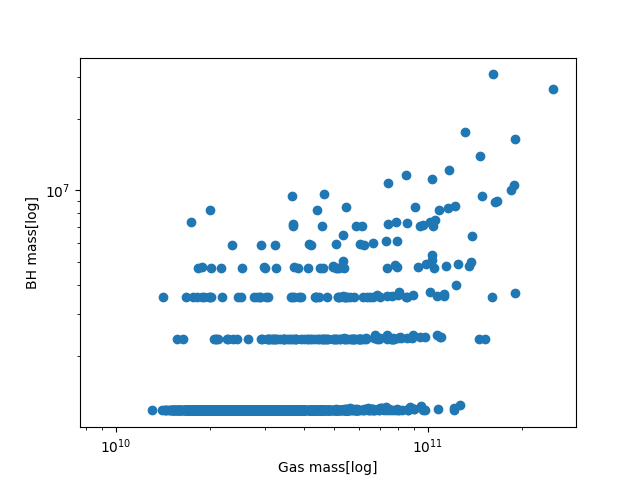  
Figure 2.1: The plot for the mass of BH in relation to the Gas mass from a simulation with BHEF of 3.0 


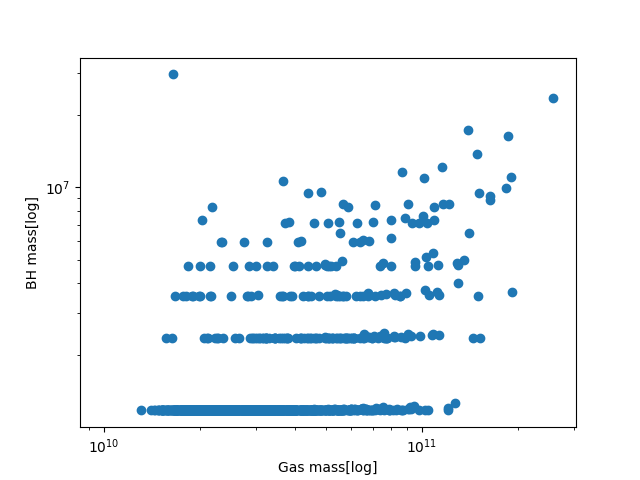

Figure 2.2: The plot for the mass of BH in relation to the Gas mass from a simulation with BHEF of 1.0

The plots show that, indeed , the mass of the BHs increase with increasing Gas mass. However, for BHEF of 3.0 the BHs that are very massive( mass >10^7 of sun masses) are more compared to BHEF of 1.0. So that suggests that there's a direct correlation between the BHEF and the masses of the BHs resulting  from accretion.


# 4. Now what? (What's next?)
## Plan for the next week

This coming week the plan is to change the energy of the stellar winds ejected from supernovae that may have an impact on the accreting BHs. In addition, we will change the minimum velocity of the aforementioned stellar winds and then run the simulations again to see the effects on the accretion  of BHs. The plots for the various quantities as functions of the stellar mass will then be compared to the reference cases and see the differences if there's any.

# 5. Bibliography

Ref[1]: Federica Sassano, Pedro R Capelo, Lucio Mayer, Raffaella Schneider, Rosa Valiante, Super-critical accretion of medium-weight seed black holes in gaseous proto-galactic nuclei, Monthly Notices of the Royal Astronomical Society, Volume 519, Issue 2, February 2023, Pages 1837–1855, https://doi.org/10.1093/mnras/stac3608